<a href="https://colab.research.google.com/github/imdressel/project_gss17/blob/main/project1_Final_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizations

# 1. Histplot: Compare marital status with hours worked a week.

The histplot above has some interesting findings:

1. The highest categories of marital status across all bins is "married" and "never married". The category "married" makes up the largest category and "never married" is second. This makes sense because most people either have a spouse or are single/dating.

2. Around 40 hours per week has the highest count by far than any other bin. This is the average number of hours worked per week with the lowest being 0 and highest being just above 80 hours per week. Additionally, all categories inclduding never married, separated, married, divorced, and widowed have the largest proportion in this bin compared to any other bin.

3. Widowed individuals worked between 20-40 hours a week.

4. The category "married" has the highest proportion in all bins. This could be due to many spouses being able to work part-time (or stay at home full-time) while their spouse work full-time. This could be attributed to having children to take care of where it is necessary for a parent to devout time to their children instead of work. Working part-time would allow married couples to spend time and take care of their children.

A scatterplot is not the best option for comparing marital status with hours worked and number of children. It is hard to see any trends here as there are not many grouping of colors given this dataset. Below are two other graphs (histplot and barplot) that provide some interesting findings comparing marital status and hours worked.

In [3]:
# Hours worked a week - HRS1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/imdressel/project_gss17/main/gss_data_20182022.csv')
df.head()

,year,id,marital,hrs1,conrinc,childs,meovrwrk,hlthdep
0,2018.0,1,never married,NaN,NaN,0.0,agree,NaN
1,2018.0,2,separated,NaN,NaN,3.0,NaN,NaN
2,2018.0,3,married,40.0,70100.0,2.0,disagree,NaN
3,2018.0,4,married,40.0,84120.0,2.0,neither agree nor disagree,NaN
4,2018.0,5,divorced,NaN,NaN,0.0,NaN,NaN


<Axes: xlabel='hrs1', ylabel='Count'>

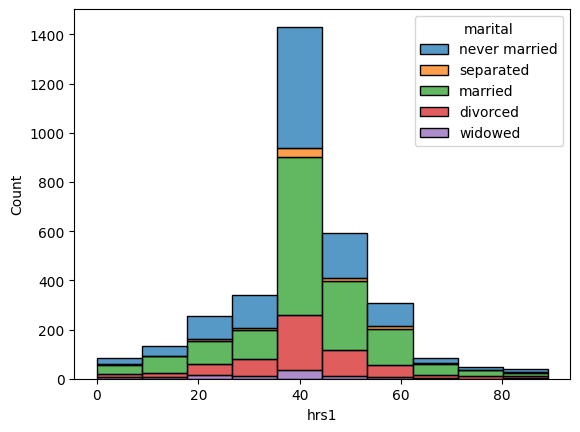

In [ ]:
# compare marital status with hours worked a week using a histplot
sns.histplot(data=df, x=df['hrs1'], hue=df['marital'], bins=10, multiple = 'stack')
plt.title('Count vs. Hours Worked A Week')
plt.xlabel('Hours Worked A Week')

# 2. Barplot: Compare marital status with mean hours worked a week.

Barplot Findings:
1. All categories are prety comparable when it comes to mean hours worked a week (around 40 hours) except widowed, which is significantly less at around 35 hours a week.

2. Separated individuals worked the most on average at above 40 hours a week. This could be due to these individuals investing less time into a relationship and more on themselves and their work life.

3. Never married individuals worked slightly less than the other categories (almost but not quite 40 hours a week). They are either dating or single so they could be focusing time on a significant other, on themselves, or on spending time with friends. Therefore, they work less than the other categories (divorced, married and separated).

In [ ]:
mean_hrs = df.groupby('marital')['hrs1'].mean()
mean_hrs

marital
divorced         41.600365
married          41.142371
never married    39.858047
separated        42.800000
widowed          34.774510
Name: hrs1, dtype: float64

Text(0, 0.5, 'Hours Worked A Week')

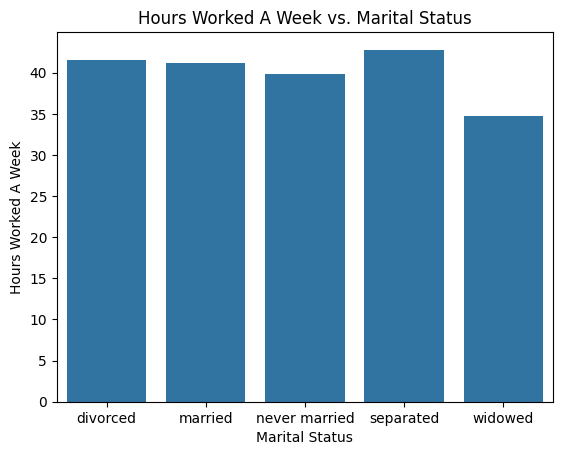

In [ ]:
## barplot: graph marital status by mean hours worked a week
sns.barplot(data=mean_hrs)

plt.title('Hours Worked A Week vs. Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Hours Worked A Week')

# 3. Histplot: Compare Marital Status with Average Income Across Years

Histplot Findings:
1. The average income has increased for all relationship types in 2022 when compared to 2018, except for the divorced category. This increase in income is likely due to annual salary increases offered by most employers.

2. Across both years (2018 and 2022), married individuals tend to have the highest average income, while never married individuals tend to have the lowest average income.

3. It is possible that married individuals have the highest income and never married individuals have the lowest income due to age. Married individuals are likely older and have more work experience, leading to better paying jobs, while never married individuals are more likely to be at the beginning of their careers. Additionally, theories such as the 'productivity theory' where marriage makes people more productive in the workplace, and  the 'specialization theory' where marriage allows men/women to specialize in the labor market by reducing time spent on housework could factor into these income differences.

In [ ]:
#Splitting into two years
df18 = df[df['year']== 2018]
df22 = df[df['year']== 2022]

In [ ]:
#Income by marital status in 2018
s_by_mar18 = df18.groupby('marital')['conrinc'].mean()
s_by_mar18
s_by_mar18_df = pd.DataFrame(s_by_mar18)

#Income by marital status in 2022
s_by_mar22 = df22.groupby('marital')['conrinc'].mean()
s_by_mar22
#On average - in 2022, salaries by each category of marriage type are higher than their counterparts in 2018 (besides divorced)
s_by_mar22_df = pd.DataFrame(s_by_mar22)

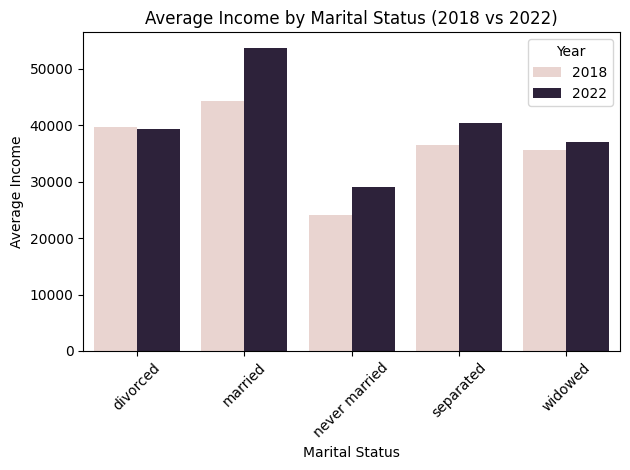

In [ ]:
#Combined Plot
s_by_mar18_df['year'] = 2018
s_by_mar22_df['year'] = 2022

comb_data = pd.concat([s_by_mar18_df, s_by_mar22_df])

sns.barplot(x='marital', y='conrinc', hue='year', data=comb_data)
plt.title('Average Income by Marital Status (2018 vs 2022)')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()
#On average, income is higher in 2022 for all categories (except for slightly lower in the divorced section).
#Married people tend to have higher incomes, and never married people tend to have the lowest incomes.

# 4. Histplots: Compare relationship between marital status and meovrwrk in 2018 and 2022

Histplot findings:

In 2018, the categories with the highest proportions are "agree" and "disagree". The proportion of marital status type for each opinion on men prioritizing work appears visually similar.
In 2022, there was a decrease in the total proportion of respondents who agree or disagree with the statement that men prioritize work and an increase in the total proportion of respondents who neither agree nor disagree compared to 2018. This could be due to increased uncertainty in all aspects of life after the pandemic. Opinions may have changed after lockdown and remote work.
The crosstab shows the numeric values in the histplot.
Below shows the proportion of values in each group, normalized by the total amount in each category for men prioritize work

In [5]:
df = pd.read_csv('./project_gss17/gss_data_20182022.csv')
df2018 = df[df['year'] == 2018].copy() # to avoid warnings
df2022 = df[df['year'] == 2022].copy()

# clean variables as needed
meovrwrk = df['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df['meovrwrk'] = meovrwrk
df['meovrwrk'] = pd.Categorical(df['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
marital = df['marital']
marital = marital.astype("string")
df['marital'] = marital
df['marital'] = pd.Categorical(df['marital'],categories=["never married","married","separated","divorced","widowed"],ordered=True)
# 2018
meovrwrk = df2018['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df2018['meovrwrk'] = meovrwrk
df2018['meovrwrk'] = pd.Categorical(df2018['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
marital = df2018['marital']
marital = marital.astype("string")
df2018['marital'] = marital
df2018['marital'] = pd.Categorical(df2018['marital'],categories=["never married","married","separated","divorced","widowed"],ordered=True)
# 2022
meovrwrk = df2022['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df2022['meovrwrk'] = meovrwrk
df2022['meovrwrk'] = pd.Categorical(df2022['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
marital = df2022['marital']
marital = marital.astype("string")
df2022['marital'] = marital
df2022['marital'] = marital
df2022['marital'] = pd.Categorical(df2022['marital'],categories=["never married","married","separated","divorced","widowed"],ordered=True)


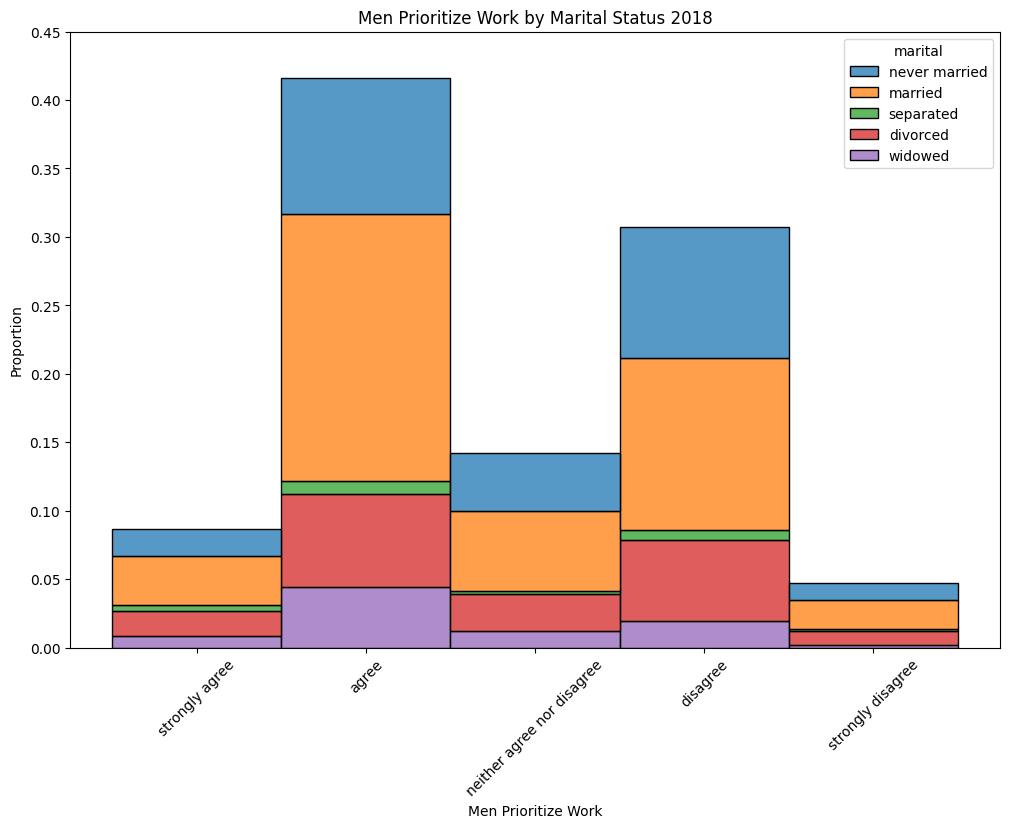

In [6]:
plt.figure(figsize=(12,8))
ax=sns.histplot(data=df2018,x=df2018['meovrwrk'],hue=df2018['marital'],stat='proportion',multiple='stack')
plt.ylim([0, 0.45])
plt.xticks(rotation=45)
plt.title("Men Prioritize Work by Marital Status 2018")
plt.xlabel("Men Prioritize Work")
plt.show()

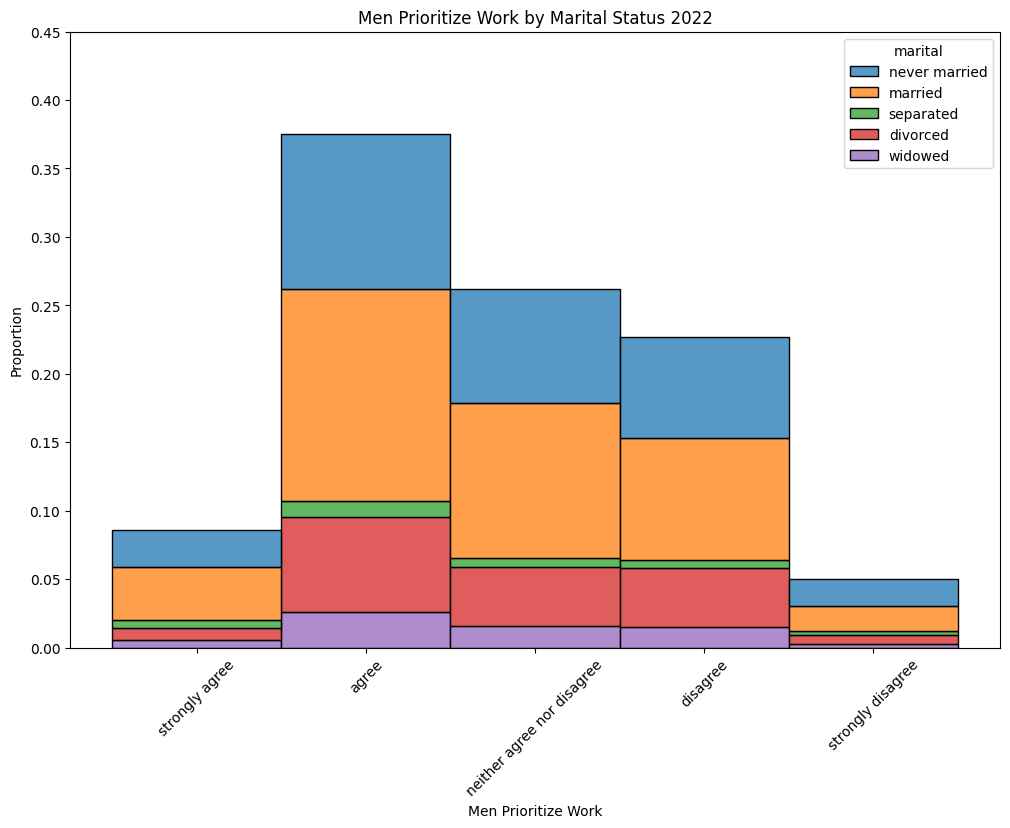

In [7]:
plt.figure(figsize=(12,8))
sns.histplot(data=df2022,x=df2022['meovrwrk'],hue=df2022['marital'],stat='proportion',multiple='stack')
plt.xticks(rotation=45)
plt.title("Men Prioritize Work by Marital Status 2022")
plt.xlabel("Men Prioritize Work")
plt.ylim([0, 0.45])
plt.show()


In [8]:
pd.crosstab(df['marital'],df['meovrwrk'],margins=True,normalize='index') # normalize each row

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree
marital,,,,,
never married,0.080895,0.361446,0.226334,0.276248,0.055077
married,0.088646,0.403764,0.216151,0.244687,0.046752
separated,0.173913,0.373913,0.156522,0.226087,0.069565
divorced,0.071533,0.391241,0.208759,0.281752,0.046715
widowed,0.091228,0.452632,0.196491,0.228070,0.031579
All,0.086030,0.391628,0.214689,0.258860,0.048793


Among people who are separated, 17% of respondents strongly agree that men prioritize work, causing family life to suffer. This is the largest proportion of respondents who strongly agree out of all marital status categories. This may be due to separated couples dealing with very significant and potentially recent marriage tensions, causing them to be separated but not yet divorced.

In [9]:
pd.crosstab(df2018['marital'],df2018['meovrwrk'],margins=True,normalize='index')

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree
marital,,,,,
never married,0.074163,0.368421,0.157895,0.354067,0.045455
married,0.081724,0.447251,0.133730,0.288262,0.049034
separated,0.179487,0.384615,0.076923,0.307692,0.051282
divorced,0.099291,0.372340,0.148936,0.322695,0.056738
widowed,0.097744,0.511278,0.142857,0.225564,0.022556
All,0.086731,0.416181,0.142395,0.307443,0.047249


In [10]:
pd.crosstab(df2022['marital'],df2022['meovrwrk'],margins=True,normalize='index')

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree
marital,,,,,
never married,0.084677,0.357527,0.264785,0.232527,0.060484
married,0.093429,0.373717,0.273101,0.214579,0.045175
separated,0.171053,0.368421,0.197368,0.184211,0.078947
divorced,0.052109,0.404467,0.250620,0.253102,0.039702
widowed,0.085526,0.401316,0.243421,0.230263,0.039474
All,0.085568,0.375479,0.262239,0.226905,0.049808


In the married marital status category, the proportion of respondents who agree that men prioritize work decreased after COVID-19 (0.48 in 2018, 0.37 in 2022). This may be due to a majority of individuals working remotely during COVID, causing a shift in perceptions on whether men prioritize work excessively.

# 5. Histplots by marital status of hours worked per week colored by meovrwrk

Histplot findings:

- A greater portion of respondents in the separated marital status category who work very high or low working hours are in agreement with the statement that family life suffers because men concentrate too much on their work compared to other marital status categories.
- For all marital status categories except for widowed, respondents who work around 40 hours per week have similar frequencies of agreement and disagreement with the statement that family life suffers because men prioritize work. For widowed respondents, there is a greater tendency toward agreement than respondents in the other marital status categories.
- In general for most marital status categories, respondents with working hours close to the mean have similar beliefs of agreement vs disagreement.

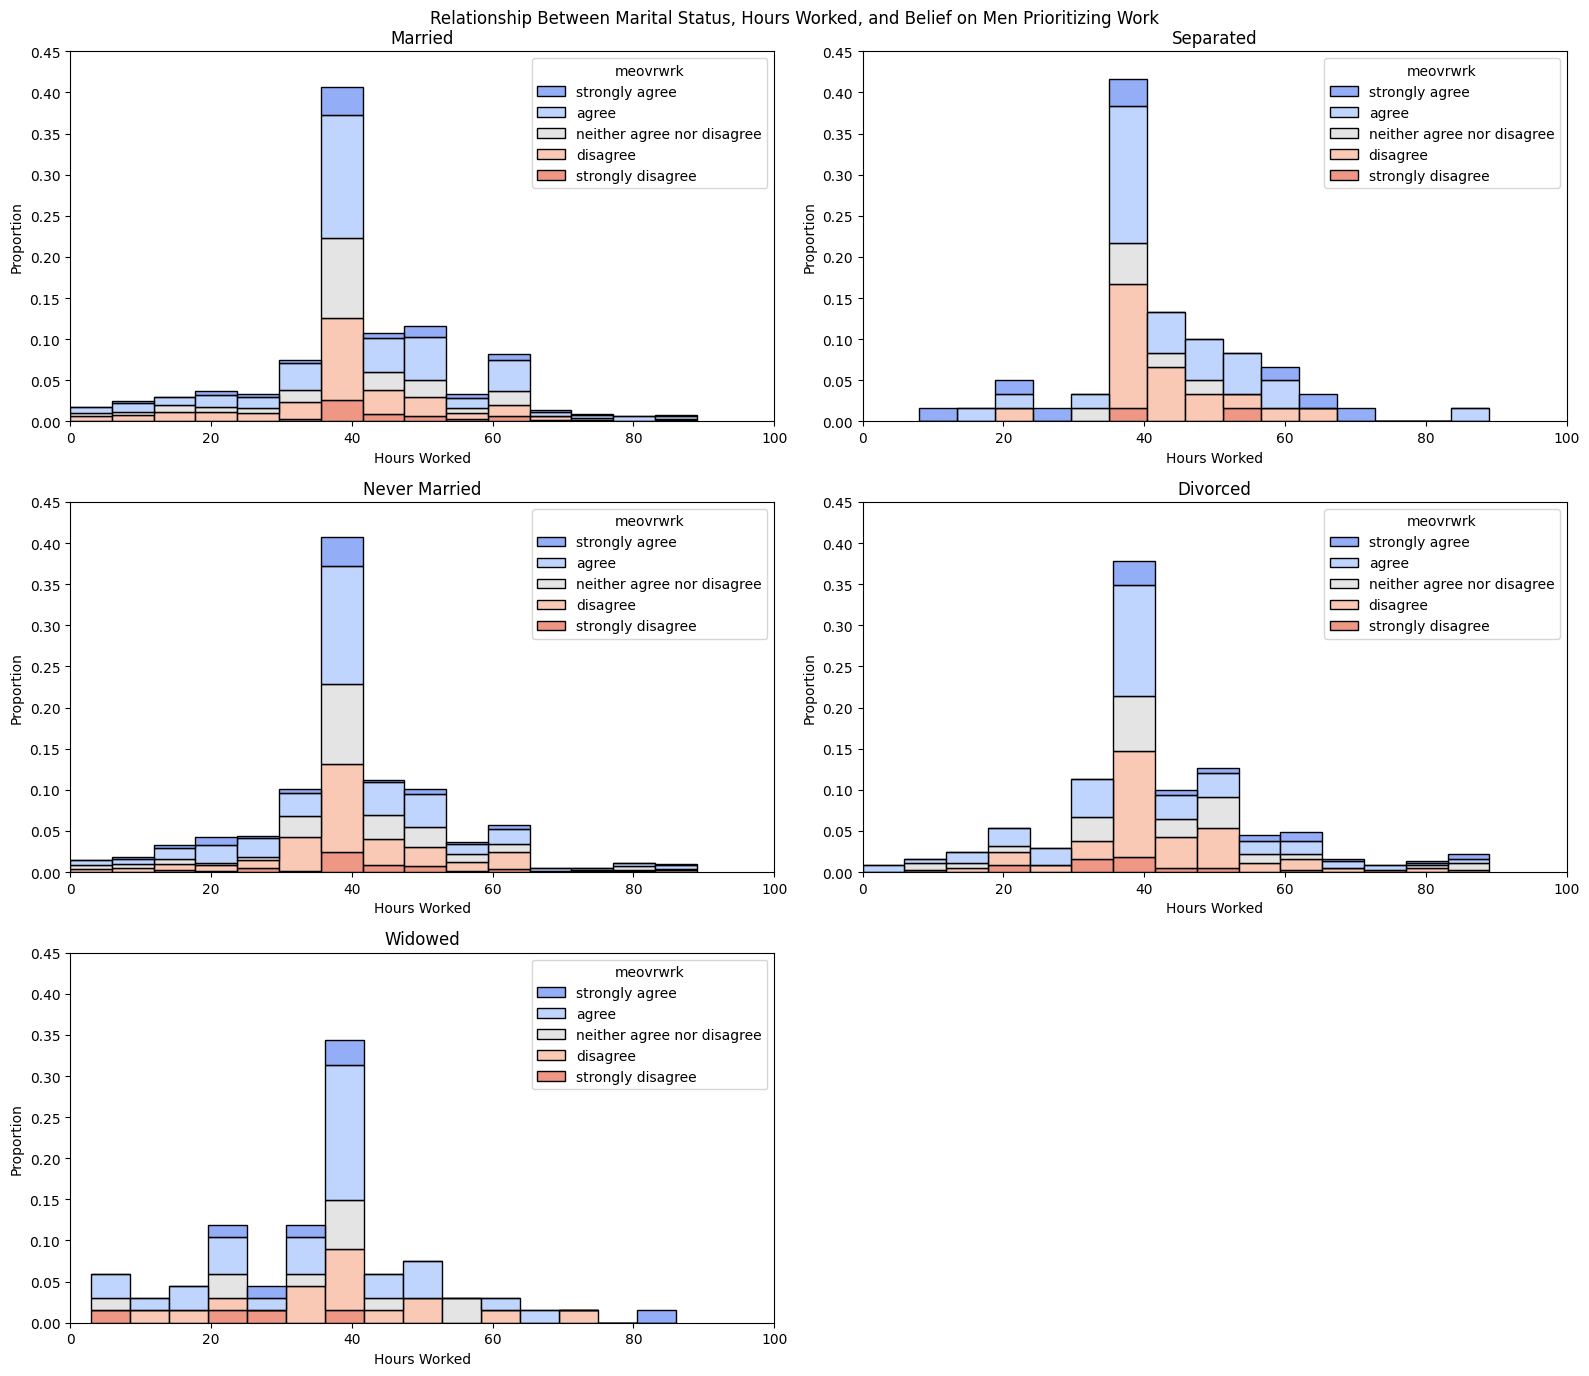

In [11]:
df_married = df[df['marital']=="married"].copy()
df_separated = df[df['marital']=="separated"].copy()
df_nevermarried = df[df['marital']=="never married"].copy()
df_divorced = df[df['marital']=="divorced"].copy()
df_widowed = df[df['marital']=="widowed"].copy()

fig, axes = plt.subplots(3, 2, figsize=(16,14))

sns.histplot(data=df_married, x=df_married['hrs1'], hue=df_married['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[0,0],palette ="coolwarm")
axes[0,0].set_title("Married")
axes[0,0].set_xlim([0, 100])
axes[0,0].set_ylim([0, 0.45])
axes[0,0].set_xlabel("Hours Worked")

sns.histplot(data=df_separated, x=df_separated['hrs1'], hue=df_separated['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[0,1],palette ="coolwarm")
axes[0,1].set_title("Separated")
axes[0,1].set_xlim([0, 100])
axes[0,1].set_ylim([0, 0.45])
axes[0,1].set_xlabel("Hours Worked")

sns.histplot(data=df_nevermarried, x=df_nevermarried['hrs1'], hue=df_nevermarried['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[1,0],palette ="coolwarm")
axes[1,0].set_title("Never Married")
axes[1,0].set_xlim([0, 100])
axes[1,0].set_ylim([0, 0.45])
axes[1,0].set_xlabel("Hours Worked")

sns.histplot(data=df_divorced, x=df_divorced['hrs1'], hue=df_divorced['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[1,1],palette ="coolwarm")
axes[1,1].set_title("Divorced")
axes[1,1].set_xlim([0, 100])
axes[1,1].set_ylim([0, 0.45])
axes[1,1].set_xlabel("Hours Worked")

sns.histplot(data=df_widowed, x=df_widowed['hrs1'], hue=df_widowed['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[2,0],palette ="coolwarm")
axes[2,0].set_title("Widowed")
axes[2,0].set_xlim([0, 100])
axes[2,0].set_ylim([0, 0.45])
axes[2,0].set_xlabel("Hours Worked")

fig.delaxes(axes[2, 1])

plt.suptitle("Relationship Between Marital Status, Hours Worked, and Belief on Men Prioritizing Work")
plt.tight_layout()
plt.show()


# 6. Histplots by marital status of number of children colored by meovrwrk

- For the separated category with greater than 4 kids, there is a much larger portion of respondents who strongly agree/agree than strongly disagree/disagree compared to the other marital status categories. This could be due to the sample size or due to additional stressors among separated coupled with many kids.
- Across all marital status groups, beliefs about men prioritizing work are more evenly split for respondents with fewer children. For respondents with more children, (>4 or >6), there tends to be more variability in beliefs. In general, there is a tendency toward agreement with the statement that men prioritizing work leads to the family life suffering. This is potentially caused by the immense amount of work and expenses required to raise a large family, requiring more responsibilities for both partners. In addition, respondents with more children (>4) appear less likely to select "neither agree nor disagree" compared to respondents with fewer children.

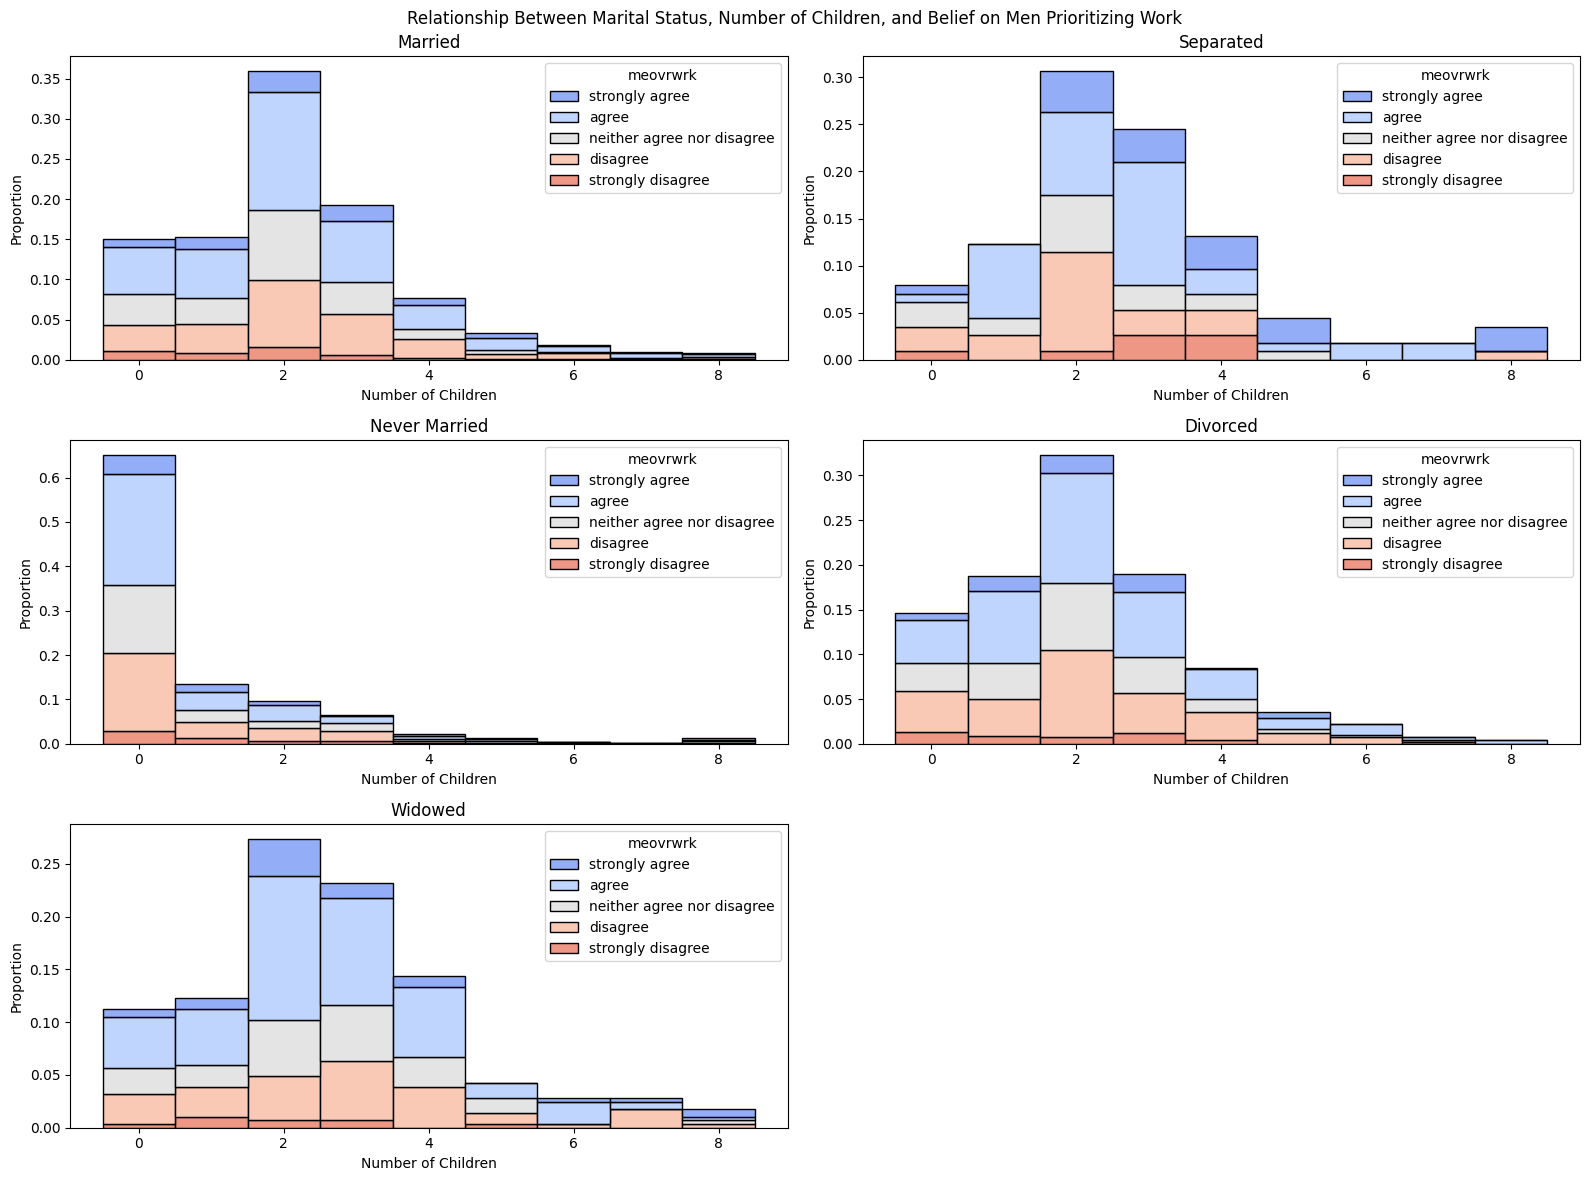

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(16,12))

sns.histplot(data=df_married, x=pd.Categorical(df_married['childs']), hue=df_married['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,0],palette ="coolwarm")
axes[0,0].set_title("Married")
axes[0,0].set_xlabel("Number of Children")

sns.histplot(data=df_separated, x=pd.Categorical(df_separated['childs']), hue=df_separated['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,1],palette ="coolwarm")
axes[0,1].set_title("Separated")
axes[0,1].set_xlabel("Number of Children")

sns.histplot(data=df_nevermarried, x=pd.Categorical(df_nevermarried['childs']), hue=df_nevermarried['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,0],palette ="coolwarm")
axes[1,0].set_title("Never Married")
axes[1,0].set_xlabel("Number of Children")

sns.histplot(data=df_divorced, x=pd.Categorical(df_divorced['childs']), hue=df_divorced['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,1],palette ="coolwarm")
axes[1,1].set_title("Divorced")
axes[1,1].set_xlabel("Number of Children")

sns.histplot(data=df_widowed, x=pd.Categorical(df_widowed['childs']), hue=df_widowed['meovrwrk'], stat='proportion', multiple='stack', ax=axes[2,0],palette ="coolwarm")
axes[2,0].set_title("Widowed")
axes[2,0].set_xlabel("Number of Children")

fig.delaxes(axes[2, 1])

plt.suptitle("Relationship Between Marital Status, Number of Children, and Belief on Men Prioritizing Work")
plt.tight_layout()
plt.show()

# Plots Below: Just in case we want a different kinds of plots lol

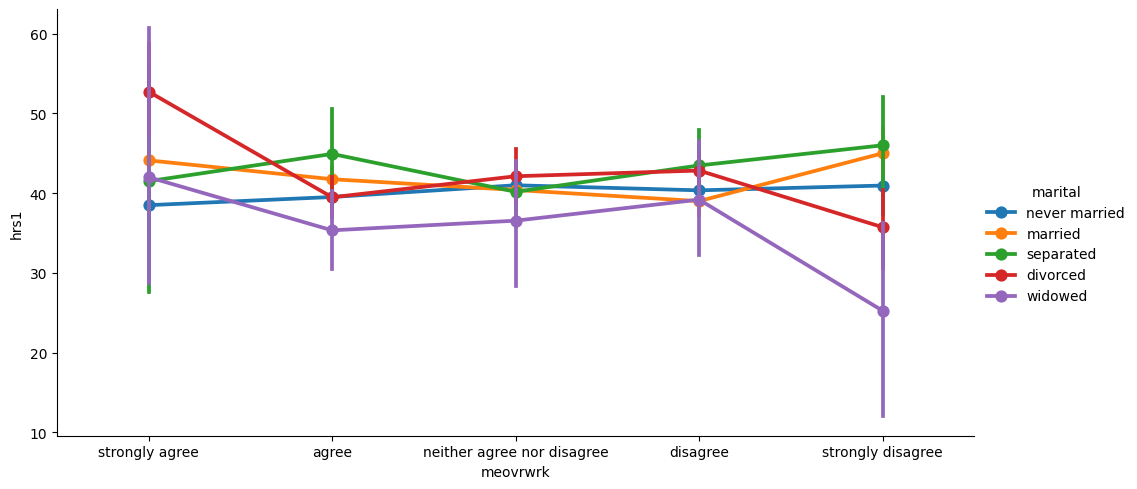

In [13]:
sns.catplot(
    data=df, x="meovrwrk", y="hrs1", hue="marital",
    kind="point",aspect=2
)

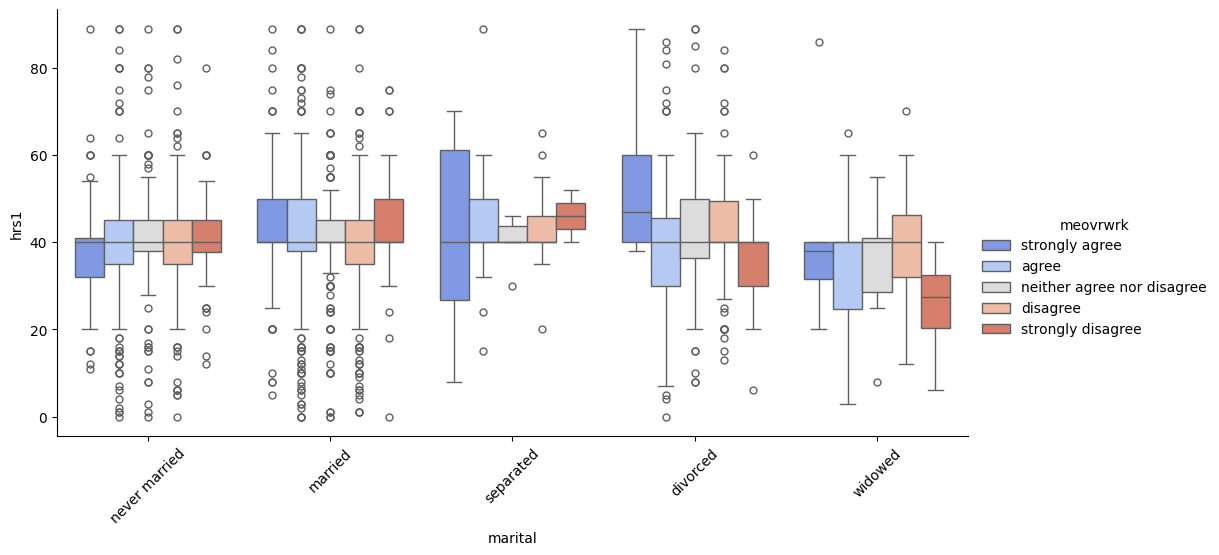

In [14]:
g=sns.catplot(
    data=df, x="marital", y="hrs1", hue="meovrwrk",
    kind="box", height=5, aspect=2, palette ="coolwarm"
)
g.set_xticklabels(rotation=45)